<a href="https://colab.research.google.com/github/sdasmaha/Ml_Engineers_445/blob/master/Notebook_2_DasMahapatra_NYSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook 2
#Name - Srinjoy DasMahapatra

## *New York Stock Exchange*

##2.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # Class to develop kmeans model
from sklearn.metrics import silhouette_score # base for clustering
from yellowbrick.cluster import SilhouetteVisualizer

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=0.5, style="ticks")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
import warnings
import os
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0}) #just to suppress warning for max plots of 20
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
        # List all files in the folder

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

In [ ]:
import plotly.express as px

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
#statistics and machine learning
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
NYSE_df = pd.ExcelFile('/content/gdrive/MyDrive/Colab Notebooks/BAJWA-ML/FInal Project BAJWA/NYSE.xls')

In [ ]:
df_fun = pd.read_excel(NYSE_df, 'fundamentals')
df_price_split = pd.read_excel(NYSE_df, 'prices-split-adjusted')
df_price = pd.read_excel(NYSE_df, 'prices')
df_security = pd.read_excel(NYSE_df, 'securities')

<a id="Description"></a>
### Dataset Description and Usage

Dataset consists of following files:

- prices.csv: raw, as-is daily prices. Most of data spans from 2010 to the end 2016, for companies new on stock market date range is shorter. There have been approx. 140 stock splits in that time, this set doesn't account for that.
- prices-split-adjusted.csv: same as prices, but there have been added adjustments for splits.
- securities.csv: general description of each company with division on sectors
- fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators.

#### Usage


<a id="read_datasets"></a>
### <i>Objective: Read-in 'fundamentals.csv' file</i>

Load datasets fundamentals.csv alongwith security.csv (for future objective) 

###2.1(a)Brief Exploration of dataset

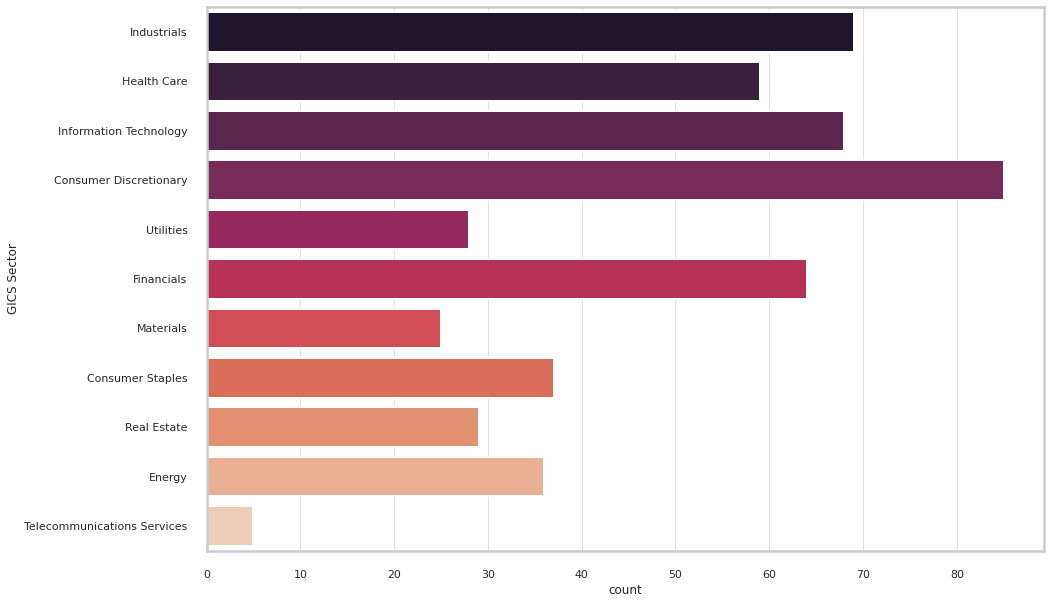

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(y='GICS Sector', data=df_security,palette='rocket')



We have the securities dataset and the stock prices dataset. What we want to do next is to fill in the stock prices dataset the sector of each stocks. In order to do this, we are gonnna use the pd.merge function:



In [ ]:
print("The dataset has ",len(df_fun['Ticker Symbol'].unique())," unique tickers")
grp_tick = df_fun.groupby('Ticker Symbol')
t_agg = grp_tick.agg(np.nanmean)

The dataset has  448  unique tickers


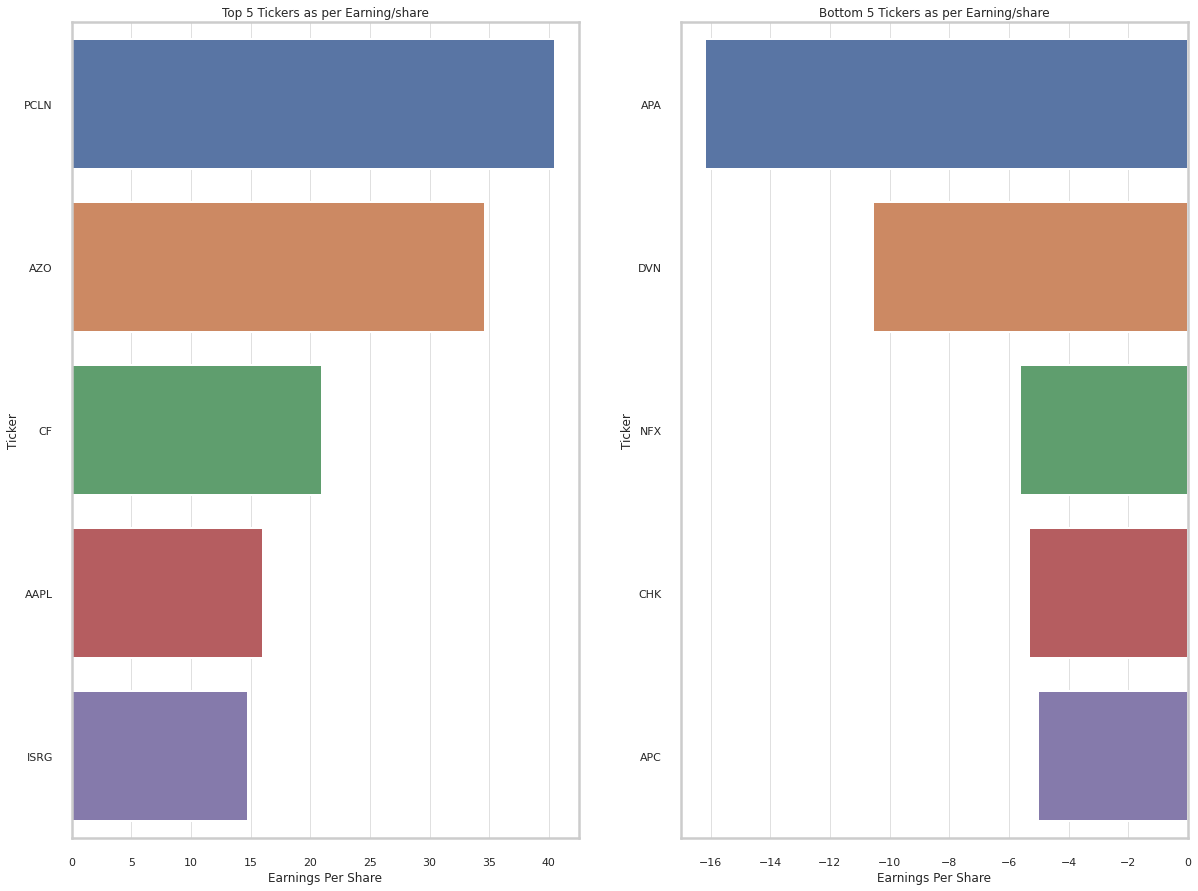

In [ ]:
t_agg['Ticker'] = t_agg.index
bottom5 = t_agg.sort_values(by = 'Earnings Per Share').head(5)
top5= t_agg.dropna().sort_values(by = 'Earnings Per Share',ascending=False).head(5)

fig = plt.figure(figsize = (20,15))
plt.subplot(1,2,1)
plt.title('Top 5 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'Earnings Per Share', data = top5)
plt.subplot(1,2,2)
plt.title('Bottom 5 Tickers as per Earning/share')
sns.barplot(y = 'Ticker', x = 'Earnings Per Share', data = bottom5)

In [ ]:
px.histogram(data_frame =df_fun,
                    x='Ticker Symbol',
                    y='Gross Profit',
                    histfunc="sum",
                  
            )

In [ ]:
top30.sort_values(by = 'Total Assets',
                  ascending=False).plot(x='Ticker',y=['Total Assets','Total Liabilities','Total Equity']
                                        ,kind='bar',figsize = (20,8),title='Asset-Liabilty composure'+' of Top30 companies')

NameError: ignored

In [ ]:
sec_df = df_security.rename(columns = {'Ticker symbol' : 'symbol','GICS Sector' : 'sector'})

In [ ]:
df_price.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [ ]:
pd_price = df_price

In [ ]:
pd_price  = pd_price.merge(sec_df[['symbol','sector']], on = 'symbol')
pd_price['date'] = pd.to_datetime(pd_price['date'])
pd_price.head()


,date,symbol,open,close,low,high,volume,sector
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600,Financials
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400,Financials
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500,Financials
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300,Financials
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600,Financials


In [ ]:
risk_free = 0.032
sector_df = pd.DataFrame({'return' : (price_df.groupby('sector')['return'].mean() - 1) * 252, 'stdev' : price_df.groupby('sector')['return'].std()})
sector_df['sharpe'] = (sector_df['return'] - risk_free) / sector_df['stdev']
plt.figure(figsize = (12,8))
ax = sns.barplot(x= sector_df['sharpe'], y = sector_df.index)



---



---



---





In [ ]:
df_fun.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [ ]:
df_fun[df_fun.columns[df_fun.isna().any()]].isna().sum().to_frame().T

,Cash Ratio,Current Ratio,Quick Ratio,For Year,Earnings Per Share,Estimated Shares Outstanding
0,299,299,299,173,219,219


In [ ]:
# Remove NaN or Null values from DataFrame

df_fun.dropna(inplace=True)

# Displaying first 10 rows of DataFrame

df_fun.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [ ]:
print("The dataset has ",len(df_fun['Ticker Symbol'].unique())," unique tickers")
grp_tick = df_fun.groupby('Ticker Symbol')
t_agg = grp_tick.agg(np.nanmean)
t_agg.head()

The dataset has  360  unique tickers


,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
Ticker Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAL,1.5,4.453250e+09,-3.075000e+07,-1.385500e+09,92.0,-4.116000e+09,1.050325e+10,59.750000,1.589500e+09,0.000000e+00,3.625000e+07,1.205850e+10,85.750000,619250000.0,6.635000e+08,1.212500e+09,1.614500e+09,8.007500e+08,0.000000e+00,0.0,2.081375e+10,3.067000e+09,63.25,2.175100e+10,-8.947500e+08,1.917250e+09,8.137500e+08,8.647500e+08,3.417500e+08,-3.552500e+08,1.421050e+10,0.000000e+00,0.0,0.0,1.053500e+09,2.675000e+07,2.822250e+09,6.770000e+08,-3.472500e+09,1.695500e+09,4.507500e+08,1.695500e+09,4.797500e+08,1.470000e+09,699000000.0,3.000000e+09,7.750000,2.157250e+09,9.342500e+08,6.310000e+09,-3.575750e+09,1.033250e+09,3.017500e+08,1.279200e+10,-150500000.0,1.089250e+09,9.25,88.00,10.25,78.750000,0.000000e+00,-7.637500e+09,-1.224500e+09,1.696275e+10,1.693250e+09,5.924000e+09,3.935700e+10,1.078250e+10,1.245650e+10,-7.655000e+08,3.847100e+10,3.770550e+10,3.380950e+10,-9.175000e+07,2013.5,-0.3600,4.707669e+08
AAP,5.5,3.097954e+09,-4.789875e+07,-2.735000e+05,25.5,-2.325330e+08,5.544462e+08,17.000000,4.765088e+08,-2.338910e+08,7.000000e+03,4.263282e+09,132.000000,0.0,2.200690e+08,2.378770e+08,7.485072e+08,6.961885e+08,-2.169500e+06,0.0,1.361297e+09,5.652835e+08,47.50,3.806642e+09,2.595258e+08,3.784918e+08,5.231875e+07,3.244222e+09,0.000000e+00,2.419820e+08,1.126650e+09,0.000000e+00,0.0,0.0,1.991052e+08,8.220250e+06,6.572910e+08,1.472708e+08,-7.941720e+08,4.366628e+08,3.176775e+07,4.366628e+08,4.366628e+08,4.212685e+08,0.0,7.487808e+08,9.500000,4.996300e+07,7.184300e+07,9.544450e+07,-1.251150e+07,-2.305975e+07,-5.616390e+08,2.304648e+08,-9208750.0,0.000000e+00,9.00,40.75,5.50,32.000000,0.000000e+00,1.347608e+09,-2.396275e+07,3.057861e+09,6.807500e+05,0.000000e+00,6.568878e+09,4.213842e+09,3.194079e+09,1.797615e+09,4.771263e+09,6.568878e+09,8.069924e+09,-9.193450e+07,2013.5,5.9625,7.323176e+07
AAPL,9.5,5.121600e+10,-2.620250e+09,1.192250e+09,36.5,-1.042925e+10,0.000000e+00,67.500000,1.742675e+10,-2.675000e+08,2.543600e+10,1.225822e+11,130.500000,0.0,3.052500e+09,9.116250e+09,5.938125e+10,5.938125e+10,0.000000e+00,0.0,2.167550e+10,4.180750e+09,39.00,7.818250e+10,1.547425e+10,3.855000e+09,0.000000e+00,2.089000e+09,-2.737700e+10,8.762250e+09,4.367575e+10,1.427180e+11,0.0,0.0,2.163100e+10,2.434500e+09,6.511725e+10,-2.303175e+10,-3.965100e+10,4.390700e+10,5.680000e+09,4.390700e+10,4.390700e+10,2.881825e+10,0.0,5.818900e+10,29.000000,5.772250e+09,1.001400e+10,8.236

In [ ]:
companywise_mean=fundamentals.groupby('TickerSymbol').mean().reset_index()

In [ ]:

px.histogram(data_frame =df_fun,
                    x='Ticker Symbol',
                    y='Gross Profit',
                    histfunc="sum",
                    template="plotly_dark"
            )

In [ ]:
# Graph showing the relationship of Net Income and Estimated shares outstanding

px.histogram(data_frame =df_fun,
                    y='Net Income',
                    x='Estimated Shares Outstanding',
                    histfunc="sum",
                    template="plotly_dark"
            )

<a id="speak"></a>
### What the datasets speaks about?
1. Fundamentals Dataset<br>
<font color=green>There are Total 79 Columns spreaded over 1781 number of entries. Object 2, means that there are *2 Categorical* columns and cannot be described exclusively. *Standard Deviation*  of all the columns have different values and only few of them are approx. 1. Variation in statistical values indicates that Dataset is intensively irregular.
This dataset consists of information about-
 -  Tickers/Stock in  NY stock exchange
 -  Financial/profitabilty parameters of a stock
 -  With the use of various parameters like Earnings per Share, Current Ratio, etc. one can decide whether to buy a stock or not?
 </font>
 <br>
 
2. Securities Dataset<br>
<font color=green>
     Dataset has 8 columns spreaded over 505 number of rows. All the columns seem to Categorical columns except the CIK. We will use this dataset with fundamentals dataset on the basis of matching 'ticker_symbols'. This will enable us to perform analysis of stocks sectorwise.
 

<a id="Rename"></a> 
### <i>Objective: Rename columns by replacing spaces</i>
i.e. Rename columns by replacing spaces in column_names with underscore and also remove other symbols from column names             such as: , (comma), . (full-stop), / (backslash) etc. That is clean the column names and assign these new names to your         dataset.

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' \ ', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(':', '').str.replace('\'', '').str.replace('\,', '').str.replace('\.', '').str.replace('&', '_')
df.columns = df.columns.str.strip().str.replace('__', '_').str.replace('/', '_')
df.columns = df.columns.str.strip().str.replace('__', '_').str.replace('___', '_')

#Cleaning Columns names of Securities dataframe as well
security_df.columns = security_df.columns.str.strip().str.lower().str.replace(' \ ', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(':', '').str.replace('\'', '').str.replace('\,', '').str.replace('\.', '').str.replace('&', '_')

In [ ]:
#let's verify whether cleaning columns names done or not?
df.columns
security_df.columns

Index(['ticker_symbol', 'security', 'sec_filings', 'gics_sector',
       'gics_sub_industry', 'address_of_headquarters', 'date_first_added',
       'cik'],
      dtype='object')

<a id="missing"></a>
### Analysis of Missing Values 

We will analyze the missing values(i.e. NaN) present in the dataset so as the results can be used for subsetting the dataset.

Total number of tuples: 1781
Percentage of  missing values: 1.1 %


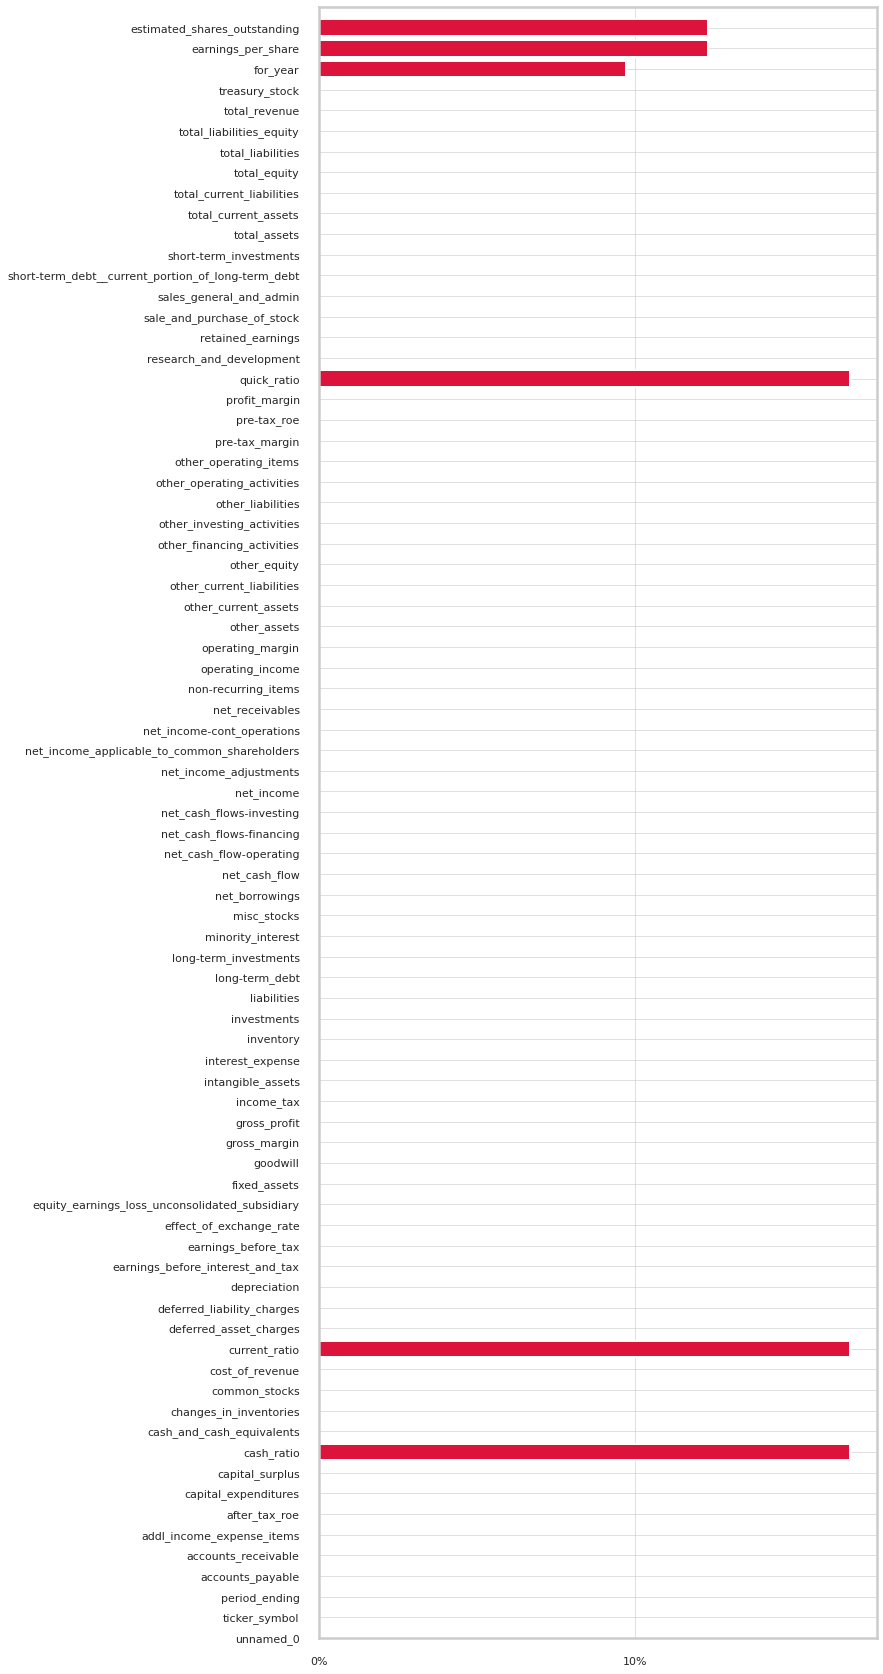

In [ ]:
missing_values = df.isna().sum()/len(df)

print("Total number of tuples:", len(df))
print("Percentage of  missing values:", round(missing_values.mean()*100,1),"%")

data_not_avlbl = []
for i in np.arange(0, len(df.columns), 10):
    data_not_avlbl.append(str(i)+"%");
plt.figure(figsize=[10,30]);

plt.yticks(np.arange(len(df.columns)), missing_values.index.values);
plt.xticks(np.arange(0, 1.1, .1), data_not_avlbl);

plt.ylim(0,len(df.columns));

plt.barh(np.arange(len(df.columns)), missing_values,color="crimson");

<font color=green>We can see from above chart that there are over 1% missing values and Most of the missing values are formula based which can be derived with the help of values available in other columns. But due to variability in Missing values, we are straight-away dropping columns/rows with NaN/Null Values.</font>

<a id="clean"></a>
### Objective: Data Cleansing / Remove NaN Rows/Columns

In [ ]:
df=df.dropna()
df.reset_index(drop=True, inplace=True)
df.columns[df.isnull().any()] # Verify whether all NaN's have gone or not
df.index[df.isnull().any(axis=1)] # Verify (columnwise) whether all NaN's have gone or not
df_filtered=df
df_filtered.head()

,unnamed_0,ticker_symbol,period_ending,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_ratio,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,current_ratio,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings_loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc_stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont_operations,net_receivables,non-recurring_items,operating_income,operating_margin,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,quick_ratio,research_and_development,retained_earnings,sale_and_purchase_of_stock,sales_general_and_admin,short-term_debt__current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_equity,total_revenue,treasury_stock,for_year,earnings_per_share,estimated_shares_outstanding
0,0,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53.0,1330000000,0,127000000,10499000000,78.0,0,223000000,1001000000,-1813000000,-2445000000,0,0,13402000000,0,58,14356000000,-569000000,869000000,632000000,580000000,306000000,473000000,7116000000,0,0,0,-1020000000,197000000,1285000000,483000000,-1571000000,-1876000000,2050000000,-1876000000,-4084000000,1124000000,386000000,148000000,1,2167000000,626000000,4524000000,-2980000000,1509000000,11000000,15147000000,-141000000,845000000,10,31,8,72.0,0,-9462000000,0,12977000000,1419000000,3412000000,23510000000,7072000000,9011000000,-7987000000,24891000000,16904000000,24855000000,-367000000,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75.0,2175000000,0,5000000,11019000000,104.0,0,935000000,1020000000,-1324000000,-2180000000,0,0,19259000000,4086000000,59,15724000000,-346000000,2311000000,856000000,1012000000,-1181000000,-235000000,15353000000,0,0,0,2208000000,660000000,675000000,3799000000,-3814000000,-1834000000,1873000000,-1834000000,-4489000000,1560000000,559000000,1399000000,5,2299000000,1465000000,7385000000,-2032000000,1711000000,481000000,14915000000,-56000000,853000000,8,80,7,96.0,0,-11296000000,0,12913000000,1446000000,8111000000,42278000000,14323000000,13806000000,-2731000000,45009000000,42278000000,26743000000,0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4668000000,-160000000,-150000000,143,-5311000000,15135000000,60.0,1768000000,0,7000000,15620000000,88.0,0,829000000,1342000000,4099000000,3212000000,0,0,23084000000,4091000000,63,27030000000,330000000,2240000000,887000000,1004000000,1799000000,-1026000000,16043000000,0,0,0,170000000,-146000000,3080000000,-315000000,-2911000000,2882000000,542000000,2882000000,2882000000,1771000000,800000000,4249000000,10,2060000000,898000000,7059000000,-4559000000,817000000,601000000,10928000000,-500000000,1295000000,8,159,7,80.0,0,-8562000000,-1052000000,20686000000,1677000000,6309000000,43225000000,11750000000,13404000000,2021000000,41204000000,43225000000,42650000000,0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5102000000,352000000,-708000000,135,-6151000000,11591000000,51.0,1085000000,0,6000000,11096000000,73.0,2477000000,667000000,1487000000,5496000000,4616000000,0,0,27510000000,4091000000,73,29894000000,-2994000000,2249000000,880000000,863000000,443000000,-633000000,18330000000,0,0,0,2856000000,-604000000,6249000000,-1259000000,-5594000000,

<a id="feature"></a>
### Feature Engineering

In [ ]:
#Let's first identify Categorical Features in the dataset
cat_features = df_filtered.dtypes[df_filtered.dtypes == 'object'].index.values 
cat_features

array(['ticker_symbol'], dtype=object)

<font color=green>So, 'ticker_symbol' & 'period_ending' are the categorical features/columns.
<br> Next, we try to- 
1. Derive year, month and day columns from period_ending column.
2. Derive Quarters from using derived month column
3. Derive various financial ratios like Leverage, debt to Equity, EBIT to Assets, NCF to Equity, Investment to RetainedEarnings
</font>

In [ ]:
df_filtered.period_ending.unique()
len(df_filtered['period_ending'].astype(str).str.slice(0, 7).unique())
df_filtered['year'] = pd.DatetimeIndex(df['period_ending']).year
df_filtered['month'] = pd.DatetimeIndex(df['period_ending']).month
df_filtered['day'] = pd.DatetimeIndex(df['period_ending']).day
df_filtered['month_year'] = pd.to_datetime(df_filtered['period_ending']).dt.to_period('M')
df_filtered['day'].astype('int');
df_filtered['year'].astype('int');
df_filtered['month'].astype('int');
def month1(x):
    if 0 < int(x) <= 3:
        return "1"            # Quarter 1
    if 3 < int(x) <= 6:
        return "2"            # Quarter 2
    if 6 < int(x) <= 9:
        return "3"            # Quarter 3
    if 9 < int(x) <= 12:
        return "4"            # Quarter 4
df_filtered['quarter'] = df_filtered['month'].map(lambda x : month1(x)) ;  # Which quarter clicked

df_filtered['leverage'] = df_filtered['total_assets'].divide(df_filtered['total_assets']-df_filtered['total_liabilities'])
df_filtered['leverage'].replace([np.inf, -np.inf], 0)
df_filtered['debtToEquity']=df_filtered['total_liabilities'].divide(df_filtered['total_equity'])
df_filtered['debtToEquity'].replace([np.inf, -np.inf], 0)
df_filtered['EBITtoAssets']=df_filtered['earnings_before_interest_and_tax'].divide(df_filtered['total_assets'])
df_filtered['EBITtoAssets'].replace([np.inf, -np.inf], 0)
df_filtered['EBITtoEquity']=df_filtered['earnings_before_interest_and_tax'].divide(df_filtered['total_equity'])
df_filtered['EBITtoEquity'].replace([np.inf, -np.inf], 0)
df_filtered['NCFtoEquity']=df_filtered['net_cash_flow-operating'].divide(df_filtered['total_equity'])
df_filtered['NCFtoEquity'].replace([np.inf, -np.inf], 0)
df_filtered['InvestToRetainedEarnings']=df_filtered['investments'].divide(df_filtered['retained_earnings'])
df_filtered['InvestToRetainedEarnings'].replace([np.inf, -np.inf], 0)

0      -0.032340
1       0.104550
2      -0.210114
3      -0.360163
4       0.000000
          ...   
1294   -0.008216
1295    0.070451
1296    0.000000
1297    0.000000
1298    0.000000
Name: InvestToRetainedEarnings, Length: 1299, dtype: float64

### Dataset Balance

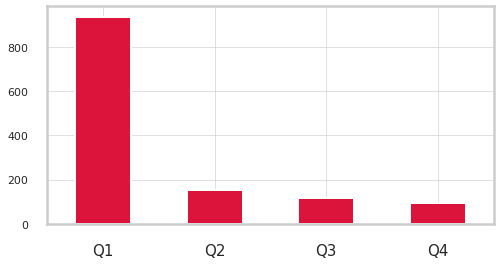

In [ ]:
ax = df_filtered['quarter'].value_counts().plot(kind='bar',figsize=(8,4),color="crimson");
ax.set_xticklabels(['Q1', 'Q2','Q3','Q4'], rotation=0, fontsize=15);

<font color=green>This clearly shows that dataset is highly imbalanced, as there is high peak for Q1 and rest are very low.</font>

<a id="Group"></a>
### _Objective: Group data by Ticker Symbols and take a mean of all numeric variables._

In [ ]:
df_filtered=df_filtered.copy()
grouped_df=df_filtered.groupby(['ticker_symbol'], as_index=True).pipe(lambda group:group.mean()).reset_index()
grouped_df.head()
grouped_df.shape

(360, 87)

<a id="visual"></a>
### _Objective: Using ungrouped and grouped data, perform visual analysis of data using seaborn and plotly-express_

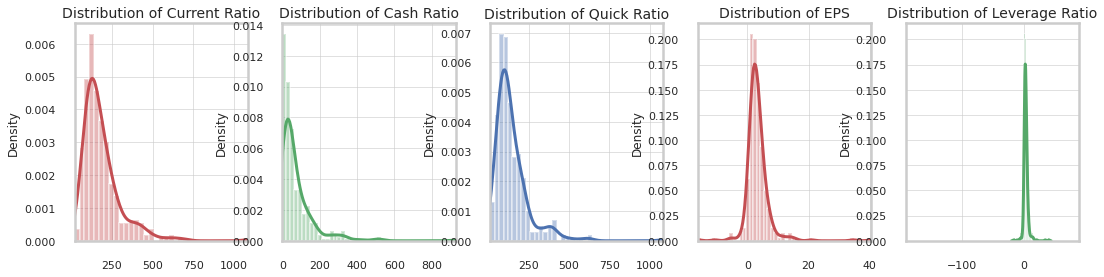

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(18,4))

current_ratio_val = grouped_df['current_ratio'].values
cash_ratio_val = grouped_df['cash_ratio'].values
quick_ratio_val = grouped_df['quick_ratio'].values
earnings_per_share_val = grouped_df['earnings_per_share'].values
leverage_val = grouped_df['leverage'].values

sns.distplot(current_ratio_val, ax=ax[0], color='r');
ax[0].set_title('Distribution of Current Ratio', fontsize=14);
ax[0].set_xlim([min(current_ratio_val), max(current_ratio_val)]);

sns.distplot(cash_ratio_val, ax=ax[1], color='g');
ax[1].set_title('Distribution of Cash Ratio', fontsize=14);
ax[1].set_xlim([min(cash_ratio_val), max(cash_ratio_val)]);

sns.distplot(quick_ratio_val, ax=ax[2], color='b');
ax[2].set_title('Distribution of Quick Ratio', fontsize=14);
ax[2].set_xlim([min(quick_ratio_val), max(quick_ratio_val)]);

sns.distplot(earnings_per_share_val, ax=ax[3], color='r');
ax[3].set_title('Distribution of EPS', fontsize=14);
ax[3].set_xlim([min(earnings_per_share_val), max(earnings_per_share_val)]);

sns.distplot(earnings_per_share_val, ax=ax[4], color='g');
ax[4].set_title('Distribution of Leverage Ratio', fontsize=14);
ax[4].set_xlim([min(leverage_val), max(leverage_val)]);
plt.show();

<font color=green>Current Ratio, Cash Ratio, Quick Ratio are left-skewed 
whereas Earning per Share(EPS) and Leverage Ratio are lying around 0-20.</font>

### Plotly Express Visualizations

In [ ]:
fig=px.scatter(grouped_df, y="earnings_per_share", x="ticker_symbol", color="ticker_symbol", 
           hover_name="ticker_symbol",size="unnamed_0", size_max=10,animation_frame=grouped_df.year.astype(int));
fig.update_traces(textposition='middle center',marker={'symbol':"circle-x"}, textfont={'color':'black','family':'Helvetica','size':17},mode="text+markers");

fig.layout.update( title_text="Ticker_Symbol Vs Earning Per Share",title_font_size=20, showlegend=True,  transition= {'duration':10000 });
fig.show();

In [ ]:
fig = px.scatter_ternary(grouped_df, a="debtToEquity", b="EBITtoEquity", c="NCFtoEquity", color="ticker_symbol", size="unnamed_0", hover_name="ticker_symbol",
                   size_max=15, color_discrete_map = {"debtToEquity": "blue", "EBITtoEquity": "green", "NCFtoEquity":"red"} )
fig.layout.update( title_text="Ternary Plot for debtToEquity Vs. EBITtoEquity Vs.  NCFtoEquity ",title_font_size=20, showlegend=True);
fig.show()

### Visualization: Yearwise Quarterwise Gross-Profit on ungrouped data

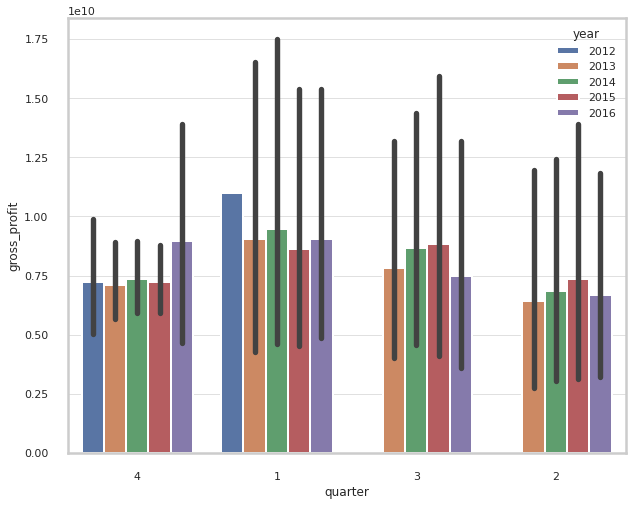

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quarter',
            y = 'gross_profit',
            hue = 'year',       
            estimator = np.mean,
            ci = 95,
            data =df_filtered)

<a id ="clustering"></a>
### Objective: Perform clustering and check Silhoutte score.

In [ ]:
ticker_list=['unnamed_0']
symbol_name=df_filtered.ticker_symbol.unique()
parameters=['total_assets','total_liabilities','total_equity','earnings_before_interest_and_tax','net_cash_flow-operating',
                'investments','retained_earnings']

data_join = df_filtered[ticker_list + parameters].dropna().to_numpy(copy=True)

#data_join
ticker_list_y_ = data_join[:,0:1]
#ticker_list_y_
y = ticker_list_y_[:,0]
#y
X = data_join[:,1:]
#X

<font color=green> Let's find releationships total_liabilities vs. total_equity & earnings_before_interest_and_tax  vs.  total_assets</font>

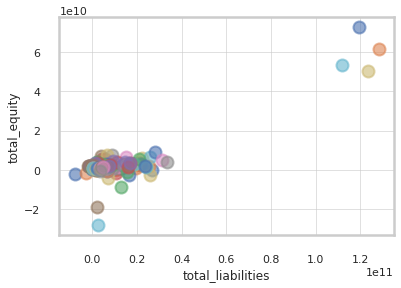

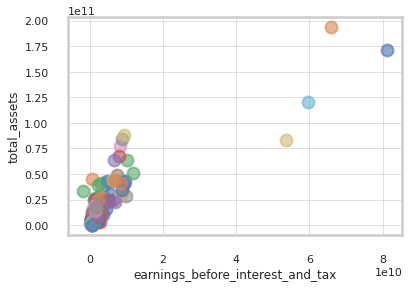

In [ ]:

# total_liabilities vs. total_equity
plt.figure();
for i in range(len(symbol_name)):
    idx = np.where(y == i)[0]
    plt.scatter(X[idx,2], X[idx,3], alpha=0.6, label=symbol_name[i]);
#plt.legend();
plt.xlabel('total_liabilities');
plt.ylabel('total_equity');
plt.show();

#  earnings_before_interest_and_tax  vs.  total_assets
plt.figure();
for i in range(len(symbol_name)):
    idx = np.where(y == i)[0]
    plt.scatter(X[idx,4], X[idx,1], alpha=0.6, label=symbol_name[i]);
#plt.legend();
plt.xlabel('earnings_before_interest_and_tax');
plt.ylabel('total_assets');
plt.show();


<a id="normalise"></a>
 ### Objective: Normalise the data using sklearn's StandardScaler()

In [ ]:
# Scale data using StandardScaler
scaler = StandardScaler();
scaler.fit(X);
X_ = scaler.transform(X);
# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split( X,               # np array without target
                                               y,               # Target
                                               test_size = 0.25 # test_size proportion
                                               )
# Examine the results
X_train.shape              # (974, 7)
X_test.shape               # (325, 7)

(325, 7)

<a id="clustering"></a>
### Objective: Perform clustering and check Silhoutte score

In [ ]:
clf = KMeans(n_clusters = 2)
#Train the object over data
clf.fit(X_train)

# What are our clusters?
clf.cluster_centers_
clf.cluster_centers_.shape         # (2, 7)
clf.labels_                        # Cluster labels for every observation
clf.labels_.size                   # 974
clf.inertia_                       # Sum of squared distance to respective centriods, SSE
silhouette_score(X_train, clf.labels_)    # 0.8814037609859733

0.8659849338375233

<font color=green>Silhoutte Score is 0.8814037609859733 and number of clusters are 2 </font>

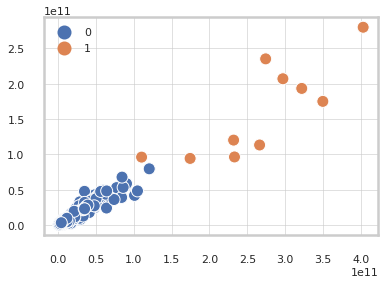

In [ ]:
#Make prediction over our test data and check accuracy
y_pred = clf.predict(X_test)
#y_pred
# How good is prediction
np.sum(y_pred == y_test)/y_test.size

# Are clusters distiguisable?
# We plot 1st and 2nd columns of X. Each point is coloured as per the cluster to which it is assigned (y_pred)
dx = pd.Series(X_test[:, 0])
dy = pd.Series(X_test[:,1])
sns.scatterplot(dx,dy, hue = y_pred);

<font color=green> 2 Clusters can be distiguished easily. </font>
Let's draw a Screen Plot and decide how many clusters are required?

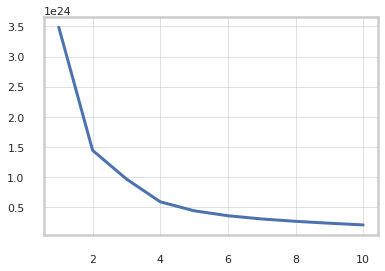

In [ ]:
# Scree plot:
sse = []
for i,j in enumerate(range(10)):
    # How many clusters?
    n_clusters = i+1
    # Create an instance of class
    clf1 = KMeans(n_clusters = n_clusters)
    # Train the kmeans object over data
    clf1.fit(X_train)
    # Store the value of inertia in sse
    sse.append(clf1.inertia_ )

#  Plot the line now
sns.lineplot(range(1, 11), sse)

<font color=green> Maximum distance is 2 points, so only 2 Clusters are required. </font>

AttributeError: ignored

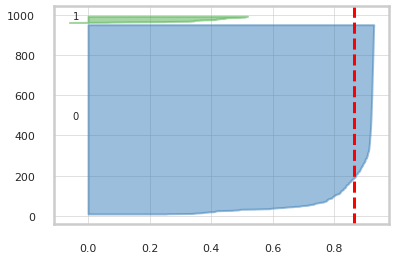

In [ ]:
visualizer = SilhouetteVisualizer(clf, colors='yellowbrick');
visualizer.fit(X_train) ;       # Fit the data to the visualizer
visualizer.show()     ;         # Finalize and render the figure

<a id="sector"></a>
### Objective: Sector-wise analysis

<font>Let's first merge the two datasets viz. Fundamentals & Securities. Method used here to merge the datasets is "Inner Join". This gives us option to merge the values based on commonality between two variables
    </font>

In [ ]:
df_fun_sec = pd.merge(df_filtered, security_df, on='ticker_symbol', how='inner')

In [ ]:
df_fun_sec.head()

,unnamed_0,ticker_symbol,period_ending,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_ratio,cash_and_cash_equivalents,changes_in_inventories,common_stocks,cost_of_revenue,current_ratio,deferred_asset_charges,deferred_liability_charges,depreciation,earnings_before_interest_and_tax,earnings_before_tax,effect_of_exchange_rate,equity_earnings_loss_unconsolidated_subsidiary,fixed_assets,goodwill,gross_margin,gross_profit,income_tax,intangible_assets,interest_expense,inventory,investments,liabilities,long-term_debt,long-term_investments,minority_interest,misc_stocks,net_borrowings,net_cash_flow,net_cash_flow-operating,net_cash_flows-financing,net_cash_flows-investing,net_income,net_income_adjustments,net_income_applicable_to_common_shareholders,net_income-cont_operations,net_receivables,non-recurring_items,operating_income,operating_margin,other_assets,other_current_assets,other_current_liabilities,other_equity,other_financing_activities,other_investing_activities,other_liabilities,other_operating_activities,other_operating_items,pre-tax_margin,pre-tax_roe,profit_margin,quick_ratio,research_and_development,retained_earnings,sale_and_purchase_of_stock,sales_general_and_admin,short-term_debt__current_portion_of_long-term_debt,short-term_investments,total_assets,total_current_assets,total_current_liabilities,total_equity,total_liabilities,total_liabilities_equity,total_revenue,treasury_stock,for_year,earnings_per_share,estimated_shares_outstanding,year,month,day,month_year,quarter,leverage,debtToEquity,EBITtoAssets,EBITtoEquity,NCFtoEquity,InvestToRetainedEarnings,security,sec_filings,gics_sector,gics_sub_industry,address_of_headquarters,date_first_added,cik
0,0,AAL,2012-12-31,3068000000,-222000000,-1961000000,23,-1888000000,4695000000,53.0,1330000000,0,127000000,10499000000,78.0,0,223000000,1001000000,-1813000000,-2445000000,0,0,13402000000,0,58,14356000000,-569000000,869000000,632000000,580000000,306000000,473000000,7116000000,0,0,0,-1020000000,197000000,1285000000,483000000,-1571000000,-1876000000,2050000000,-1876000000,-4084000000,1124000000,386000000,148000000,1,2167000000,626000000,4524000000,-2980000000,1509000000,11000000,15147000000,-141000000,845000000,10,31,8,72.0,0,-9462000000,0,12977000000,1419000000,3412000000,23510000000,7072000000,9011000000,-7987000000,24891000000,16904000000,24855000000,-367000000,2012.0,-5.60,3.350000e+08,2012,12,31,2012-12,4,-17.023896,-3.116439,-0.077116,0.226994,-0.160886,-0.032340,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,1,AAL,2013-12-31,4975000000,-93000000,-2723000000,67,-3114000000,10592000000,75.0,2175000000,0,5000000,11019000000,104.0,0,935000000,1020000000,-1324000000,-2180000000,0,0,19259000000,4086000000,59,15724000000,-346000000,2311000000,856000000,1012000000,-1181000000,-235000000,15353000000,0,0,0,2208000000,660000000,675000000,3799000000,-3814000000,-1834000000,1873000000,-1834000000,-4489000000,1560000000,559000000,1399000000,5,2299000000,1465000000,7385000000,-2032000000,1711000000,481000000,14915000000,-56000000,853000000,8,80,7,96.0,0,-11296000000,0,12913000000,1446000000,8111000000,42278000000,14323000000,13806000000,-2731000000,45009000000,42278000000,26743000000,0,2013.0,-11.25,1.630222e+08,2013,12,31,2013-12,4,-15.480776,-16.480776,-0.031317,0.484804,-0.247162,0.104550,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,2,AAL,2014-12-31,4668000000,-160000000,-150000000,143,-5311000000,15135000000,60.0,1768000000,0,7000000,15620000000,88.0,0,829000000,1342000000,4099000000,3212000000,0,0,23084000000,4091000000,63,27030000000,330000000,2240000000,887000000,1004000000,1799000000,-1026000000,16043000000,0,0,0,170000000,-146000000,3080000000,-315000000,-2911000000,2882000000,542000000,2882000000,2882000000,1771000000,800000000,4249000000,10,2060000000,898000000,7059000000,-4559000000,817000000,601000000,10928000000,-500000

In [ ]:
#Find Unique GICS Sectors
df_fun_sec['gics_sector'].unique()
df_fun_sec.shape

(1299, 97)

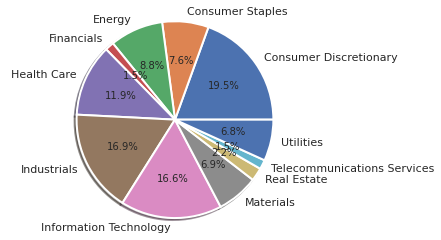

In [ ]:
#Distribution of Sectors %agewise

labels = df_fun_sec['gics_sector'].astype('category').cat.categories.tolist()
counts = df_fun_sec['gics_sector'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True); #autopct is to show the % on plot
ax1.axis('equal')
plt.show();

<a id="vizsector"></a>
### Visualizations on Sectorwise Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

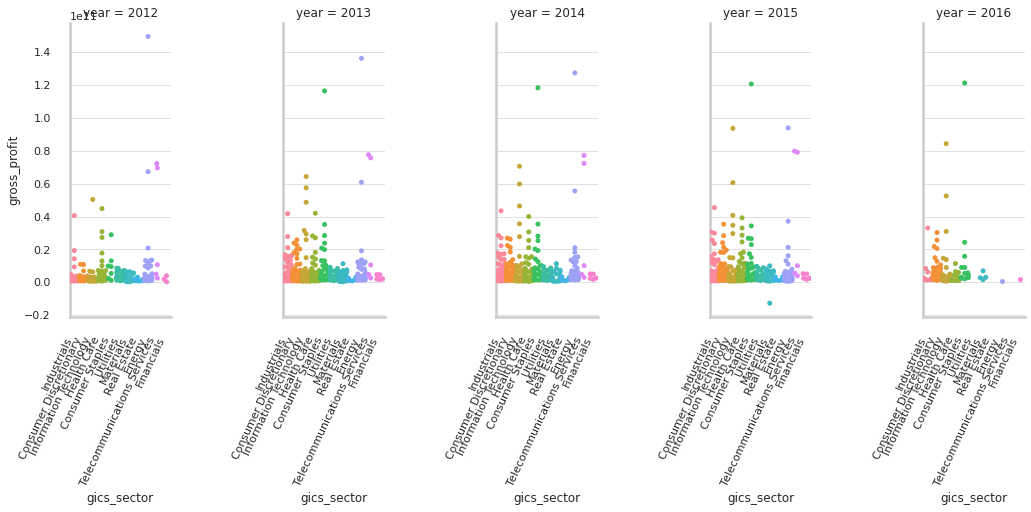

In [ ]:
ax=sns.catplot(x="gics_sector", y="gross_profit", hue="gics_sector",
            col="year", aspect=.6,
            kind="swarm", data=df_fun_sec);
ax.set_xticklabels(rotation=65, horizontalalignment='right')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

84.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning:

85.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.p

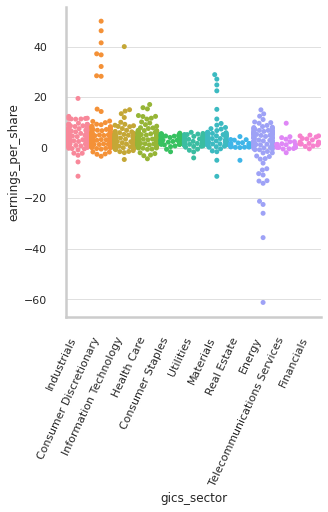

In [ ]:
ax=sns.catplot(x="gics_sector", y="earnings_per_share", kind="swarm", data=df_fun_sec);
ax.set_xticklabels(rotation=65, horizontalalignment='right')

<font color=green>From above visualization, we may conclude that Stocks belonging to  'Consumer Discretionary' sector have high Earning per share, whereas Stocks pertaining to 'Energy Sector' have quite risky preposition.  </font>

###2.1(a)Brief Exploration of dataset

###2.1(b)Preprocessing of dataset

###2.1(c)Feature Extraction/Learning from dataset

###2.1(d)Processing of dataset using Machine Learning Model

###2.1(e)Comparitive analysis of ML model on dataset

###2.1(f)Ethical issues for the dataset

###2.1(g)Bibliography of notebook